In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
font = {'size'   : 15}

plt.rc('font', **font)

In [2]:
folder_path = "average"

cn = pd.read_csv(folder_path + "/cn_mili_joules.csv")
human = pd.read_csv(folder_path + "/human_mili_joules.csv")
sr = pd.read_csv(folder_path + "/sr_mili_joules.csv")
ts = pd.read_csv(folder_path + "/ts_mili_joules.csv")

In [3]:
cn = cn.rename(columns={cn.columns[0]: "name"})
human = human.rename(columns={human.columns[0]: "name"})
sr = sr.rename(columns={sr.columns[0]: "name"})
ts = ts.rename(columns={ts.columns[0]: "name"})

llama = pd.concat([cn, sr, ts], ignore_index=True)

In [4]:
ts

,name,count,mean,sd,min,X25,X50,X75,max
0,TS-Python-0.6,30,367.505100,133.775023,0.122063,421.848426,426.050467,429.231774,451.101380
1,TS-Python-0.8,30,401.551561,64.143682,283.153262,424.884318,427.803363,431.572781,476.746948
2,TS-Python-1,30,397.756635,63.005850,283.656916,423.840950,426.989103,430.511413,472.598932
3,TS-E-Python-0.6,30,432.254214,9.272692,423.272259,427.007008,428.958073,433.195355,462.220896
4,TS-E-Python-0.8,30,434.190543,10.148303,424.278069,427.624893,430.597734,434.583514,460.314831
5,TS-E-Python-1,30,435.426038,34.574759,423.624326,425.430409,427.802724,431.313510,615.710834
6,TS-C++-0.6,30,41.435807,0.578531,40.394726,41.102350,41.421016,41.665454,43.209643
7,TS-C++-0.8,30,35.558857,13.083349,0.131205,41.222622,41.483970,41.833235,43.551624
8,TS-C++-1,30,35.694479,13.115912,0.129793,41.041366,41.743652,41.986151,43.455467
9,TS-E-C++-0.6,30,0.147001,0.037572,0.123141,0.133789,0.138052,0.147447,0.337562


In [5]:
for index, row in llama.iterrows():
    name = row['name'].split('-')
    llama.at[index, 'algorithm'] = name[0]
    if name[1] == 'E':
        llama.at[index, 'efficient'] = True
        llama.at[index, 'language'] = name[2]
        llama.at[index, 'temperature'] = name[3]
    else: 
        llama.at[index, 'efficient'] = False
        llama.at[index, 'language'] = name[1]
        llama.at[index, 'temperature'] = name[2]

for index, row in human.iterrows():
    name = row['name'].split('-')
    human.at[index, 'algorithm'] = name[0]
    human.at[index, 'language'] = name[2] 

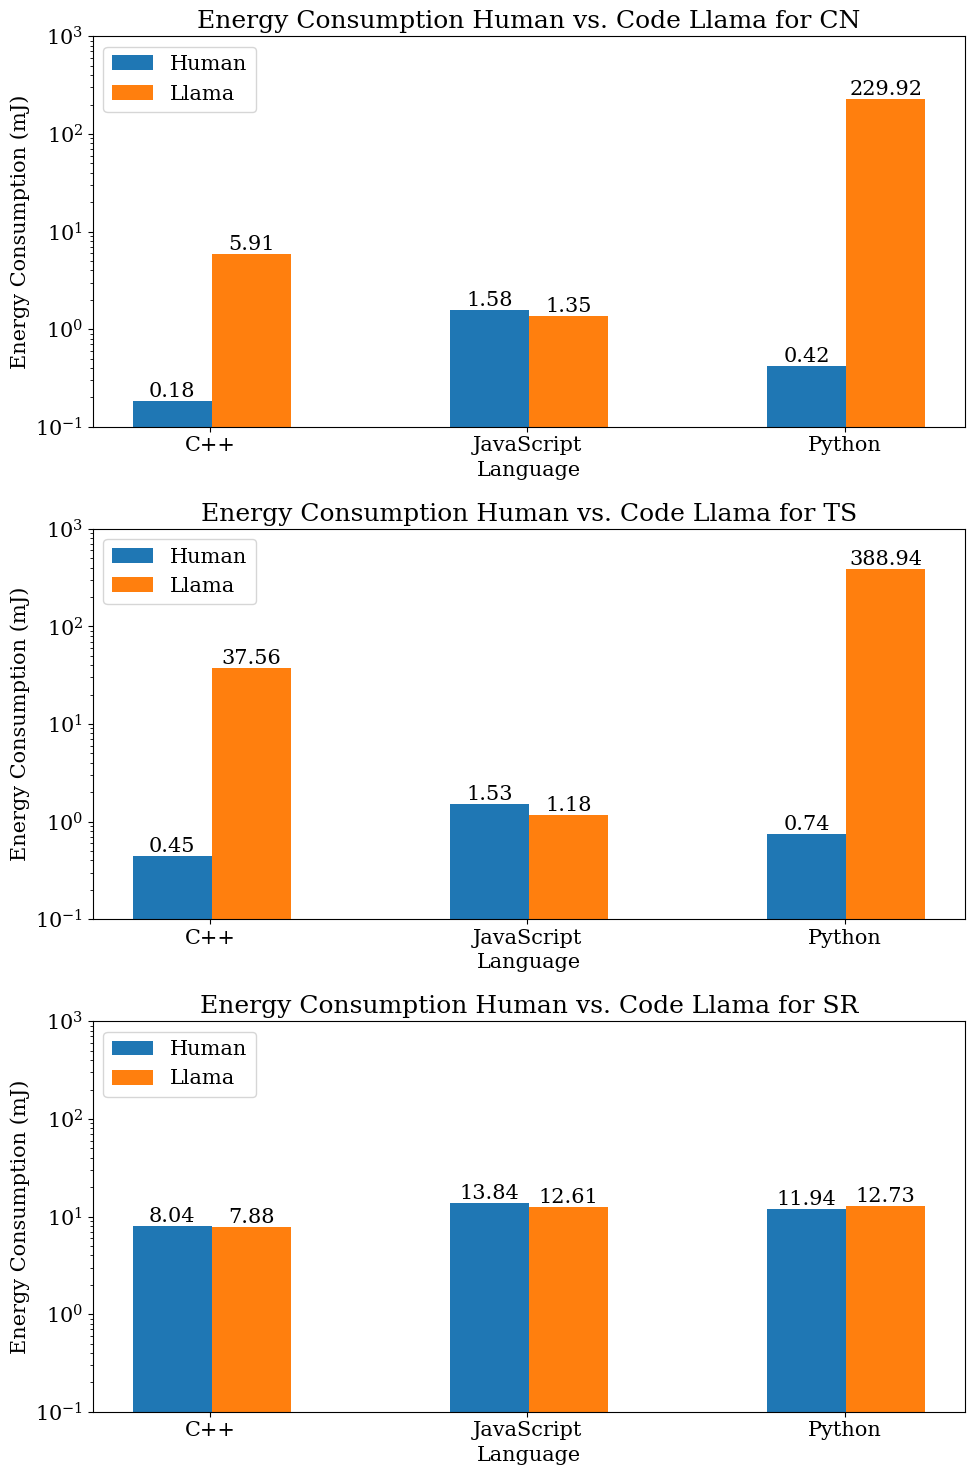

In [24]:
def group_and_calculate_mean(df, group_cols, mean_col):
    grouped_df = df.groupby(group_cols)
    result = grouped_df[mean_col].mean().reset_index()
    return result

non_efficient = llama[llama['efficient'] == False]
result = group_and_calculate_mean(non_efficient, ['algorithm', 'language'], 'mean')

human = human.rename(columns={'mean': 'human_mean'})
result = result.rename(columns={'mean': 'llama_mean'})
human_llama = pd.merge(human, result, on=['algorithm', 'language'])

cn = human_llama[human_llama['algorithm'] == 'CN']
sr = human_llama[human_llama['algorithm'] == 'SR']
ts = human_llama[human_llama['algorithm'] == 'TS']


def plot_benchmarks(df, title, subplot_position):
    plt.subplot(3, 1, subplot_position)  

    barWidth = 0.25
    
    r1 = np.arange(len(df['language']))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, df['human_mean'], width=barWidth, label='Human')
    plt.bar(r2, df['llama_mean'], width=barWidth, label='Llama')

    plt.xticks(r1 + 0.12, df['language'])
    
    plt.xlabel('Language')
    plt.ylabel('Energy Consumption (mJ)')
    plt.title(title)
    
    plt.yscale('log')
    plt.ylim(0.1, 1000)
    

    plt.legend(loc='upper left')
    for i, v in enumerate(df['human_mean']):
        plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    for i, v in enumerate(df['llama_mean']):
        plt.text(i + 0.25, v, str(round(v, 2)), ha='center', va='bottom')

plt.figure(figsize=(10, 15))  
plot_benchmarks(cn, 'Energy Consumption Human vs. Code Llama for CN', 1)
plot_benchmarks(ts, 'Energy Consumption Human vs. Code Llama for TS', 2)
plot_benchmarks(sr, 'Energy Consumption Human vs. Code Llama for SR', 3)
#plt.show()
#plt.draw()
plt.tight_layout()
plt.savefig('p1.svg', dpi=100)

In [7]:
efficient_data = llama[llama['efficient'] == 1]
efficient_mean = group_and_calculate_mean(efficient_data, ['algorithm', 'language'], 'mean')

In [8]:
non_efficient_data = llama[llama['efficient'] == 0]
non_efficient_mean = group_and_calculate_mean(non_efficient_data, ['algorithm', 'language'], 'mean')

In [9]:
#algorithm, language, efficient_mean, llama_mean
dataset1 = efficient_mean.rename(columns={'mean': 'efficient_mean'})
dataset2 = non_efficient_mean.rename(columns={'mean': 'non_efficient_mean'})

In [10]:
data = dataset1.merge(dataset2, how='outer', on=['algorithm','language'])

In [11]:
cn = data[data['algorithm'] == 'CN']
sr = data[data['algorithm'] == 'SR']
ts = data[data['algorithm'] == 'TS']

In [12]:
def plot_benchmarks(df, title, subplot_position):
    plt.subplot(3, 1, subplot_position)  

    barWidth = 0.25
    
    r1 = np.arange(len(df['language']))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, df['non_efficient_mean'], width=barWidth, label='Basic')
    plt.bar(r2, df['efficient_mean'], width=barWidth, label='Efficient')

    # plt.xticks([r + barWidth for r in range(len(df['language']))], df['language'])
    plt.xticks(r1 + 0.12, df['language'])
    
    plt.xlabel('Language')
    plt.ylabel('Energy Consumption (mJ)')
    plt.title(title)
    
    plt.yscale('log')
    plt.ylim(0.1, 1000)
    

    plt.legend(loc='upper left')
    for i, v in enumerate(df['non_efficient_mean']):
        plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
    for i, v in enumerate(df['efficient_mean']):
        plt.text(i + 0.27, v, str(round(v, 2)), ha='center', va='bottom')

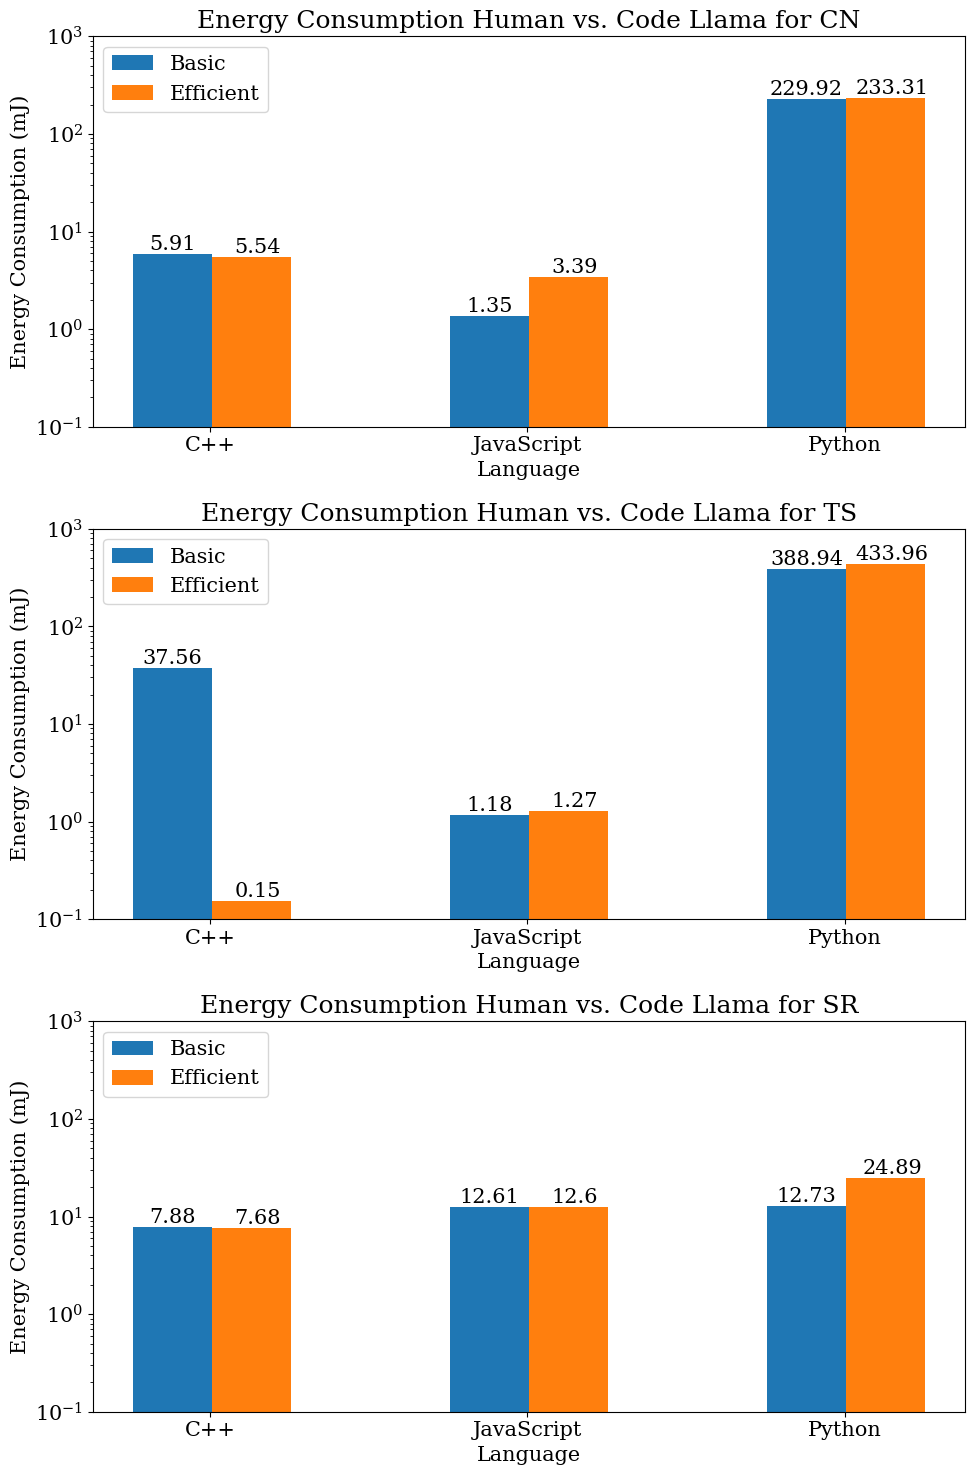

In [23]:
plt.figure(figsize=(10, 15))  
plot_benchmarks(cn, 'Energy Consumption Human vs. Code Llama for CN', 1)
plot_benchmarks(ts, 'Energy Consumption Human vs. Code Llama for TS', 2)
plot_benchmarks(sr, 'Energy Consumption Human vs. Code Llama for SR', 3)

plt.tight_layout()
plt.savefig('p2.svg', dpi=100)